## Sequential

In [35]:
import sys
sys.path.insert(0, '..')

In [36]:
from module import Module
from linear import Linear
from activation import TanH, Sigmoid, ReLU
from sequential import Sequential
from loss import MSELoss
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def train(net, loss_fn, X_train, y_train, learning_rate):
    net.zero_grad()
    y_pred = net(X_train)
    loss = loss_fn(y_train, y_pred).mean()
    delta = loss_fn.backward(y_train, y_pred)
    net.backward_update_gradient(X_train, delta)
    net.update_parameters(learning_rate)
    return loss

In [13]:
def train_evaluate_loop(net, loss_fn, X_train, y_train, X_test, y_test, evaluate_fn, learning_rate=1e-3, n_epochs=1_000):
    train_loss = []
    test_loss = []
    test_acc = []
    for epoch in range(n_epochs):
        epoch_train_loss = train(net, loss_fn, X_train, y_train, learning_rate)
        epoch_test_loss, epoch_test_acc = evaluate_fn(net, loss_fn, X_test, y_test)
        train_loss.append(epoch_train_loss)
        test_loss.append(epoch_test_loss)
        test_acc.append(epoch_test_acc)
        if (epoch + 1) % (n_epochs // 10) == 0:
            print(f"Epoch {epoch + 1}: train loss = {epoch_train_loss:.4f}, test loss = {epoch_test_loss:.4f}, test acc = {epoch_test_acc:.4f}")
    return train_loss, test_loss, test_acc

### Linear + TanH + Linear + Sigmoid

In [14]:
def LTLS(input, hidden, output):
    return Sequential(
        Linear(input, hidden),
        TanH(),
        Linear(hidden, output),
        Sigmoid()
    )

In [15]:
def generate_data_ltls(input, hidden, output, n_samples=1_000):
    np.random.seed(42)
    X = np.random.randn(n_samples, input)
    W1 = np.random.random((input, hidden))
    W2 = np.random.random((hidden, output))
    y = Sigmoid() ((TanH() ((X @ W1+ np.random.random()))) @ W2 + np.random.random()).reshape(-1)
    y = np.where(y >= .5, 1, 0)
    return X, y

In [16]:
def evaluate_ltls(net, loss_fn, X_test, y_test):
    yhat = net(X_test)
    loss = loss_fn(y_test, yhat).mean()
    acc = ((yhat >= 0.5).astype(int) == y_test).mean()
    return loss, acc

In [17]:
net = LTLS(2, 10, 1)
X, y = generate_data_ltls(2, 10, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
loss_fn = MSELoss()
train_loss, test_loss, test_acc = train_evaluate_loop(net, loss_fn, X_train, y_train, X_test, y_test, evaluate_ltls,  1e-3, 10_000)

Epoch 1000: train loss = 0.1933, test loss = 0.1994, test acc = 0.6988
Epoch 2000: train loss = 0.1531, test loss = 0.1564, test acc = 0.7591
Epoch 3000: train loss = 0.1285, test loss = 0.1296, test acc = 0.7733
Epoch 4000: train loss = 0.1121, test loss = 0.1118, test acc = 0.7769
Epoch 5000: train loss = 0.1005, test loss = 0.0992, test acc = 0.7769
Epoch 6000: train loss = 0.0918, test loss = 0.0898, test acc = 0.7769
Epoch 7000: train loss = 0.0850, test loss = 0.0826, test acc = 0.7769
Epoch 8000: train loss = 0.0795, test loss = 0.0767, test acc = 0.7769
Epoch 9000: train loss = 0.0750, test loss = 0.0720, test acc = 0.7769
Epoch 10000: train loss = 0.0711, test loss = 0.0680, test acc = 0.7769


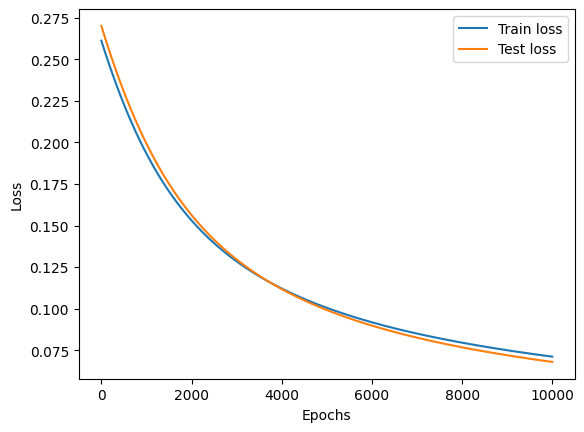

In [18]:
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

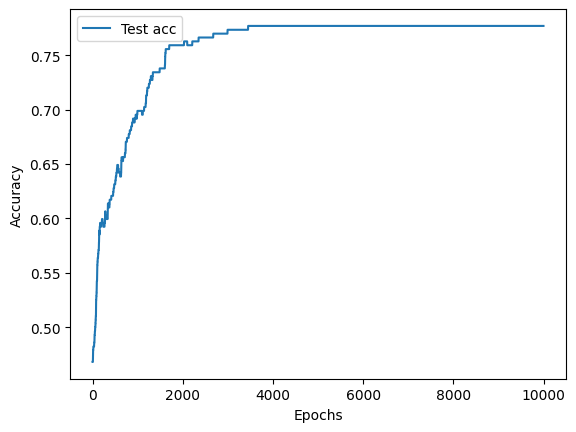

In [19]:
plt.plot(test_acc, label='Test acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Linear + TanH + Linear + ReLu + Linear + Sigmoid

In [20]:
def LTLRLS(input, hidden1, hidden2, output):
    return Sequential(
        Linear(input, hidden1),
        TanH(),
        Linear(hidden1, hidden2),
        ReLU(),
        Linear(hidden2, output),
        Sigmoid()
    )

In [21]:
net = LTLRLS(2, 20, 10, 1)
loss_fn = MSELoss()
train_loss, test_loss, test_acc = train_evaluate_loop(net, loss_fn, X_train, y_train, X_test, y_test, evaluate_ltls,  1e-3, 10_000)

Epoch 1000: train loss = 0.2180, test loss = 0.2142, test acc = 0.7485
Epoch 2000: train loss = 0.1783, test loss = 0.1743, test acc = 0.8479
Epoch 3000: train loss = 0.1529, test loss = 0.1489, test acc = 0.8550
Epoch 4000: train loss = 0.1362, test loss = 0.1321, test acc = 0.8550
Epoch 5000: train loss = 0.1246, test loss = 0.1205, test acc = 0.8550
Epoch 6000: train loss = 0.1162, test loss = 0.1121, test acc = 0.8550
Epoch 7000: train loss = 0.1096, test loss = 0.1055, test acc = 0.8550
Epoch 8000: train loss = 0.1041, test loss = 0.1002, test acc = 0.8550
Epoch 9000: train loss = 0.0994, test loss = 0.0956, test acc = 0.8515
Epoch 10000: train loss = 0.0950, test loss = 0.0915, test acc = 0.8479


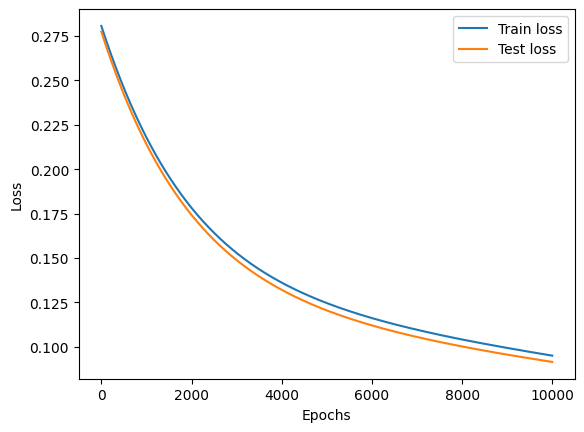

In [22]:
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

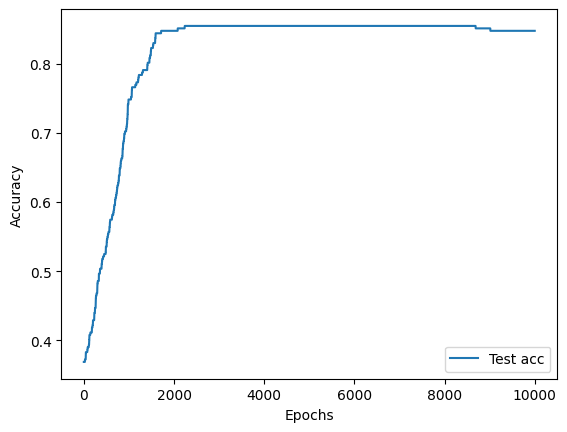

In [23]:
plt.plot(test_acc, label='Test acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
net = LTLRLS(2, 30, 20, 1)
loss_fn = MSELoss()
train_loss, test_loss, test_acc = train_evaluate_loop(net, loss_fn, X_train, y_train, X_test, y_test, evaluate_ltls,  1e-3, 10_000)

Epoch 1000: train loss = 0.1826, test loss = 0.1866, test acc = 0.8053
Epoch 2000: train loss = 0.1396, test loss = 0.1406, test acc = 0.8017
Epoch 3000: train loss = 0.1154, test loss = 0.1153, test acc = 0.7875
Epoch 4000: train loss = 0.1000, test loss = 0.0996, test acc = 0.7840
Epoch 5000: train loss = 0.0894, test loss = 0.0891, test acc = 0.7769
Epoch 6000: train loss = 0.0817, test loss = 0.0816, test acc = 0.7733
Epoch 7000: train loss = 0.0757, test loss = 0.0759, test acc = 0.7698
Epoch 8000: train loss = 0.0710, test loss = 0.0714, test acc = 0.7627
Epoch 9000: train loss = 0.0672, test loss = 0.0678, test acc = 0.7591
Epoch 10000: train loss = 0.0640, test loss = 0.0648, test acc = 0.7591


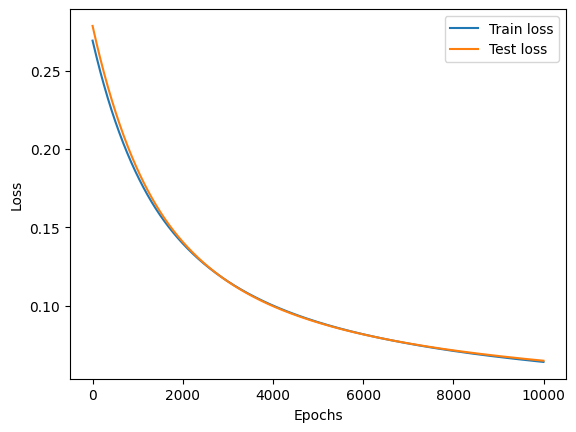

In [25]:
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

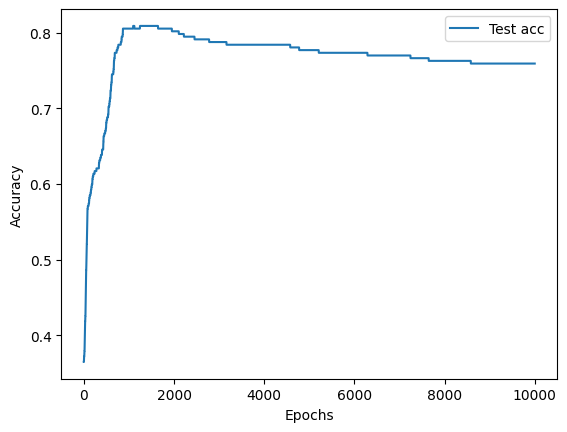

In [26]:
plt.plot(test_acc, label='Test acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Linear + TanH + Linear + TanH + Linear + Sigmoid

In [27]:
def LTLTLS(input, hidden1, hidden2, output):
    return Sequential(
        Linear(input, hidden1),
        TanH(),
        Linear(hidden1, hidden2),
        TanH(),
        Linear(hidden2, output),
        Sigmoid()
    )

In [28]:
net = LTLTLS(2, 20, 10, 1)
loss_fn = MSELoss()
train_loss, test_loss, test_acc = train_evaluate_loop(net, loss_fn, X_train, y_train, X_test, y_test, evaluate_ltls,  1e-3, 10_000)

Epoch 1000: train loss = 0.1668, test loss = 0.1589, test acc = 0.6633
Epoch 2000: train loss = 0.1268, test loss = 0.1205, test acc = 0.6917
Epoch 3000: train loss = 0.1043, test loss = 0.0991, test acc = 0.7166
Epoch 4000: train loss = 0.0901, test loss = 0.0856, test acc = 0.7379
Epoch 5000: train loss = 0.0803, test loss = 0.0762, test acc = 0.7591
Epoch 6000: train loss = 0.0730, test loss = 0.0691, test acc = 0.7591
Epoch 7000: train loss = 0.0672, test loss = 0.0636, test acc = 0.7591
Epoch 8000: train loss = 0.0625, test loss = 0.0591, test acc = 0.7591
Epoch 9000: train loss = 0.0585, test loss = 0.0554, test acc = 0.7591
Epoch 10000: train loss = 0.0551, test loss = 0.0522, test acc = 0.7591


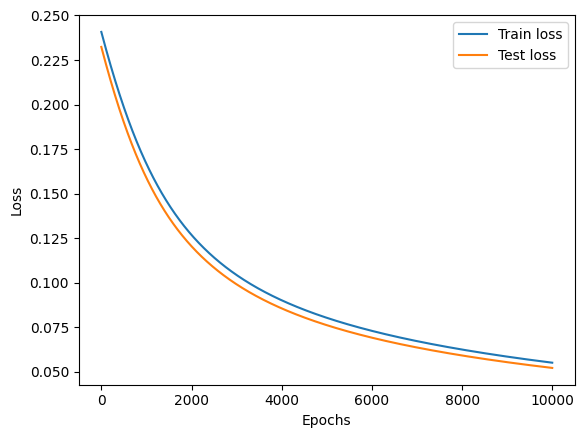

In [29]:
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

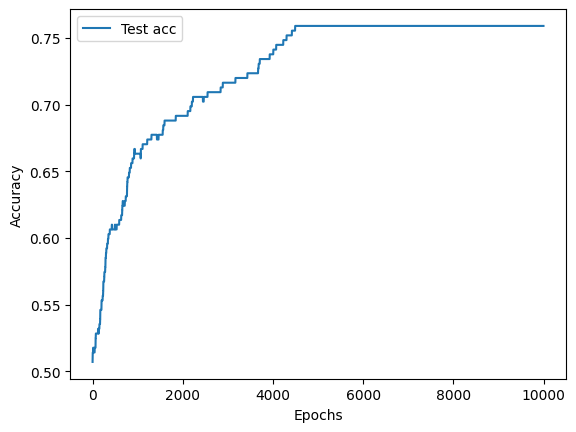

In [30]:
plt.plot(test_acc, label='Test acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
net = LTLTLS(2, 30, 20, 1)
loss_fn = MSELoss()
train_loss, test_loss, test_acc = train_evaluate_loop(net, loss_fn, X_train, y_train, X_test, y_test, evaluate_ltls,  1e-3, 20_000)

Epoch 2000: train loss = 0.1292, test loss = 0.1301, test acc = 0.7237
Epoch 4000: train loss = 0.0936, test loss = 0.0927, test acc = 0.7450
Epoch 6000: train loss = 0.0761, test loss = 0.0746, test acc = 0.7520
Epoch 8000: train loss = 0.0654, test loss = 0.0638, test acc = 0.7627
Epoch 10000: train loss = 0.0580, test loss = 0.0565, test acc = 0.7662
Epoch 12000: train loss = 0.0525, test loss = 0.0511, test acc = 0.7627
Epoch 14000: train loss = 0.0481, test loss = 0.0468, test acc = 0.7662
Epoch 16000: train loss = 0.0446, test loss = 0.0434, test acc = 0.7662
Epoch 18000: train loss = 0.0416, test loss = 0.0405, test acc = 0.7662
Epoch 20000: train loss = 0.0390, test loss = 0.0380, test acc = 0.7556


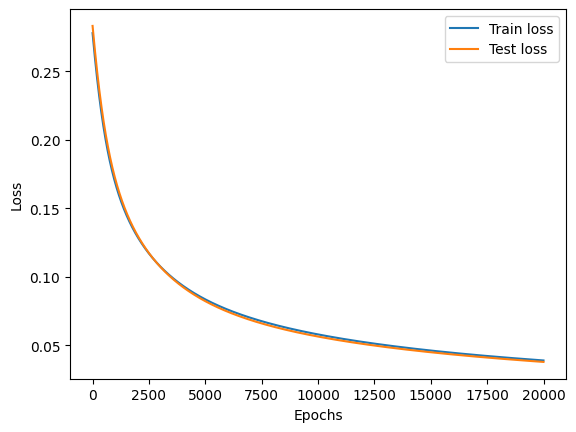

In [32]:
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

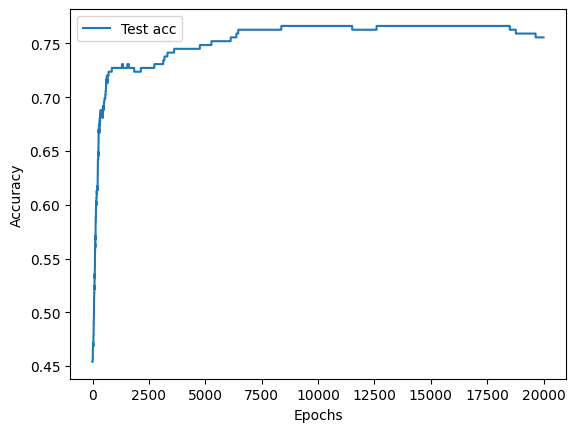

In [33]:
plt.plot(test_acc, label='Test acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()